In [46]:
# 导入相关模块和导入数据集
import numpy as np
import pandas as pd
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs
# 生成样本数据
centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = make_blobs(n_samples=10000, centers=centers, cluster_std=0.6)
import matplotlib.pyplot as plt
import plotly.express as px
Table = pd.DataFrame(X)
Table.columns = ['one', 'two']
Table['Class'] = _
Table.index = [np.linspace(2, 10001, 10000)]
Table

import plotly.express as px



px.scatter(Table, x=Table.one, y=Table.two, color=Table.Class, width=600, height=600)


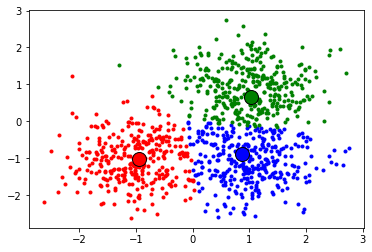

In [1]:
# 导入相关模块和导入数据集
import numpy as np
import pandas as pd
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs
# 生成样本数据
centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = make_blobs(n_samples=1000, centers=centers, cluster_std=0.6)
es_bandwidth = estimate_bandwidth(X,quantile=0.2, n_samples= 500)
'''
estimate_bandwidth()用于生成mean-shift窗口的尺寸，
其参数的意义为：从X中随机选取500个样本，
计算每一对样本的距离，然后选取这些距离的0.2分位数作为返回值
'''
MS = MeanShift(bandwidth=es_bandwidth)
MS.fit(X)
labels = MS.labels_
cluster_centers = MS.cluster_centers_
uni_labels = np.unique(labels)
n_clusters_ = len(uni_labels)
import matplotlib.pyplot as plt
from itertools import cycle
# 对算法聚类结果进行可视化
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.show()

# PCA LDA

PCA: [0.92461872 0.05306648]
LDA: [0.9912126 0.0087874]


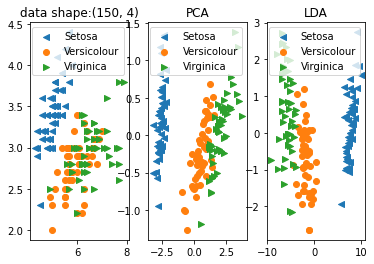

In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

iris = datasets.load_iris()
X = iris.data
y = iris.target

plt.subplot(131)
for name, label, m in [('Setosa', 0, "<"), ('Versicolour', 1, "o"),
                       ('Virginica', 2, ">")]:
    plt.scatter(X[y == label, 0], X[y == label, 1], label=name, marker=m)
plt.legend()
plt.title("data shape:%s" % (X.shape, ))

# PCA降维
plt.subplot(132)
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

for name, label, m in [('Setosa', 0, "<"), ('Versicolour', 1, "o"),
                       ('Virginica', 2, ">")]:
    plt.scatter(X_pca[y == label, 0],
                X_pca[y == label, 1],
                label=name,
                marker=m)

plt.legend()
plt.title("PCA")
# 降维后各维度上的方差比,方差比越高,说明该维度的信息保留度越高。
print('PCA:', pca.explained_variance_ratio_)

# LDA
plt.subplot(133)
lda = LDA(n_components=2).fit(X, y)
X_lda = lda.transform(X)

for name, label, m in [('Setosa', 0, "<"), ('Versicolour', 1, "o"),
                       ('Virginica', 2, ">")]:
    plt.scatter(X_lda[y == label, 0],
                X_lda[y == label, 1],
                label=name,
                marker=m)
plt.legend()
plt.title("LDA")
print('LDA:', lda.explained_variance_ratio_)

plt.show()

# K折交叉验证

sklearn中配合机器学习使用

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
iris = load_iris()

X = iris.data
y = iris.target

# 实例化KNN模型,KNN的K=5
knn = KNeighborsClassifier(n_neighbors=5)
# 10-fold cross-validation,cv=10
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)


# 计算平均值
print(scores.mean())


[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]
0.9666666666666668
